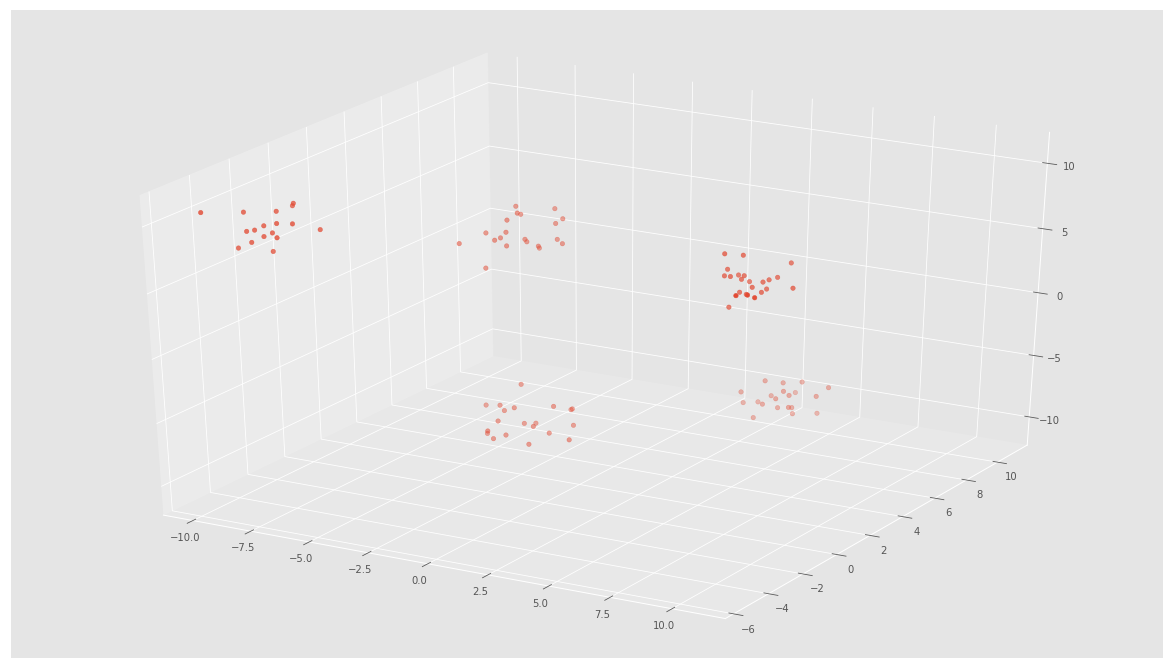

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
dataset = pd.read_csv('edlich-kmeans-A0.csv') # import data

# extract data from dataframe in single variables to create an array
column1 = dataset['V1'].values
column2 = dataset['V2'].values
column3 = dataset['V3'].values
# create array to work on
X = np.array(list(zip(column1,column2,column3)))

# plot given data in 3-dimensional system
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(column1,column2,column3)

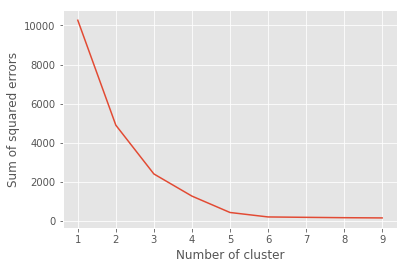

In [5]:
# now finding the right k or right amount of groups
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared errors")
plt.show()

The 'elbow' is at k = 5 so let be k = 5. It also fits pretty clear to the clusters from the graph above.

In [3]:
# assume k = 5
k = 5
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

# find the cluster centers
cluster_centers = kmeans.cluster_centers_
display(cluster_centers)

array([[-2.40331671,  2.14752865, -8.02378894],
       [-5.10691526,  5.60179825,  3.71956936],
       [ 3.66536804,  8.91074968, -9.06579829],
       [ 6.47155208,  2.70446035,  5.19967608],
       [-8.53242046, -3.55401526,  8.96857685]])

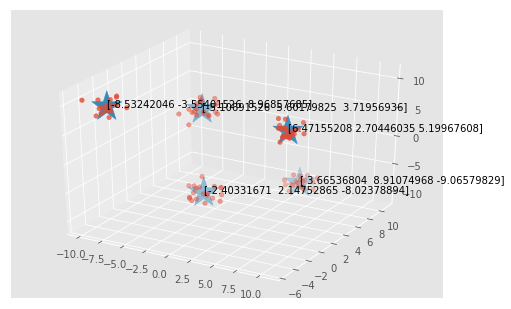

In [6]:
# plot the graph including the centers calculated above
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(column1,column2,column3)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='*', s=1000) # plot stars and adjust size
for i in range(len(cluster_centers)):
    ax.text(cluster_centers[i,0],cluster_centers[i,1],cluster_centers[i,2], '%s' % (str(cluster_centers[i])), size=10, zorder=1)